In [273]:
'''
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_json('historic_rates.json', lines=True)
# print(df.shape)
# df = df[['id','close','high','low','open','time','volume']]
df = df[:30000]# take first 10000 lines of data
df= df[['close']] # only look at close price
dataset = df.values.astype('float32')
# print(dataset)
# transfer the dataset to be ranged from 0-1 thus could be used in the active function
dataset = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset)
print(dataset)
'''

"\nimport pandas as pd\nfrom sklearn.preprocessing import MinMaxScaler\n\ndf = pd.read_json('historic_rates.json', lines=True)\n# print(df.shape)\n# df = df[['id','close','high','low','open','time','volume']]\ndf = df[:30000]# take first 10000 lines of data\ndf= df[['close']] # only look at close price\ndataset = df.values.astype('float32')\n# print(dataset)\n# transfer the dataset to be ranged from 0-1 thus could be used in the active function\ndataset = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset)\nprint(dataset)\n"

In [274]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import json
import math

def data_extraction(filename):
    """
    Use for data-extraction (JSON to pandas df?)
    Including the train/test data splitting
    :return:
    """

    return dataset

def feature_engineering(df):
    """
    preprocess data for better result
    :return:
    """
# def take_by_window(dataset, window):
#     x, y = [], []
#     for i in range(len(dataset) - window - 1):
#         x.append(dataset[i:(i + window), 0])
#         y.append(dataset[i + window, 0])
#     x = np.array(x)
#     y = np.array(y)
#     x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
#     return x, y
def dataset_setup(dataset1=None, dataset2=None, look_back=2, sentiment=False):
    """
    """
    data_X = list()
    data_y = list()

    for i in range(len(dataset1)-look_back-1):
#         if not i < look_back:
            price = dataset1[i:(i + look_back), 0].tolist()
            if sentiment:
                price.append(dataset2[i])
            data_X.append(price)
            data_y.append(dataset1[i + look_back, 0])
#             print(data_X)
    return np.array(data_X), np.array(data_y)

def dataset_reshape(data_X):
    
    return np.reshape(data_X, (data_X.shape[0], 1, data_X.shape[1]))
    
def dataset_gen(filename_data=None, filename_sentiment=None, look_back=2, train_test_split=0.85, start_data=None, sentiment=False):
    """
    Use for data-extraction (JSON to pandas df?)
    input data from sentiment analysis
    Including the train/test data splitting
    :return:
    """
    df = pd.read_json(filename_data, lines=True)
    df1 = df[:30000]
    df1 = df1[['close']]  # only take the closing price
    dataset1 = df1.values.astype('float32')
    
    mms = MinMaxScaler(feature_range=(0, 1))
    dataset = mms.fit_transform(dataset1)
#     df = pd.read_csv('filename_sentiment', header=None)
#     df2 = df.iloc[:, 0]  # first column represents the mean tweets polarities per minute

    train_size = int(len(dataset1) * train_test_split)
    train_set, test_set = dataset1[0:train_size, : ], dataset1[train_size: , : ]
    print(len(train_set),len(test_set),len(dataset1))
    
    train_X, train_y = dataset_setup(train_set, look_back=look_back)
    test_X, test_y = dataset_setup(test_set, look_back=look_back)
    
    train_X = dataset_reshape(train_X)
    test_X = dataset_reshape(test_X)
    print(train_X.shape)
    print(train_y.shape)
    return train_X, train_y, test_X, test_y

def pred_model(train_X, train_Y, test_X, test_y, epochs=300, batch_size=100, verbose=0, shuffle=False):
    """
    ML model: LSTM
    Look_back: how many point
    :return:
    """

    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))  # output file size
    model.add(Activation('tanh'))  # active function
    model.add(Dropout(0.2))  # drop out regulation
    model.compile(loss='mse', optimizer='adam')

    model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    score = model.evaluate(test_X, test_y, batch_size=batch_size)
    
    return score, model.predict(train_X), model.predict(test_X)


#if __name__ == "__main__":
    #df = pd.read_json('historic_rates.json', lines=True)
    #print(df.shape)
    

In [275]:
train_X, train_y, test_X, test_y = dataset_gen('historic_rates.json')

25500 4500 30000
(25497, 1, 2)
(25497,)


In [154]:
# df = pd.read_json('historic_rates.json', lines=True)
# df = df[:30000]
# df= df[['close']]
# dataset = df.values.astype('float32')
# mms = MinMaxScaler(feature_range=(0, 1))
# dataset = mms.fit_transform(dataset)

In [155]:
# #dataset = data_extraction('historic_rates.json')
# train_size = int(len(dataset)*0.85)
# train_set, test_set = dataset[0:train_size, : ], dataset[train_size: , : ]
# print(len(train_set),len(test_set),len(dataset))


25500 4500 30000


In [156]:
# x_train, y_train = take_by_window(train_set, 2)
# x_test, y_test = take_by_window(test_set, 2)


In [157]:
#x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
#x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [276]:
score, pred_train, pred_test = pred_model(train_X, train_y, test_X, test_y, epochs=20, batch_size=100, verbose=0)
print(score)

4497/4497 [==============================] - 1s 188us/step
47598010.1259


In [254]:
train_pred = mms.inverse_transform(pred_train.reshape(1, -1))
train_y = mms.inverse_transform(train_y.reshape(1, -1))
test_pred = mms.inverse_transform(pred_test.reshape(1, -1))
test_y = mms.inverse_transform(test_y.reshape(1, -1))

In [256]:
# print(y_test)
# print(pred_test)
rmse_2 = math.sqrt(mean_squared_error(test_y, test_pred))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 66.158


In [128]:
window = 10
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(pred_train) + window, :] = pred_train 

ValueError: could not broadcast input array from shape (1,25489) into shape (1,1)

In [129]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(pred_train) + (window * 2) + 1:len(dataset) - 1, :] = pred_test

ValueError: could not broadcast input array from shape (1,4489) into shape (29977,1)

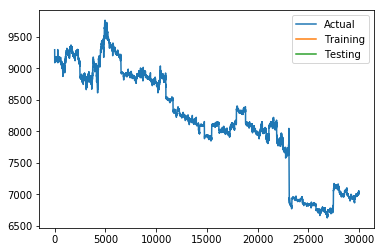

In [130]:
plt.plot(df, label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [131]:
trainScore = math.sqrt(mean_squared_error(y_train, pred_train[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, pred_test[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: y_true and y_pred have different number of output (25489!=1)